In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.models import load_model


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[2]

4

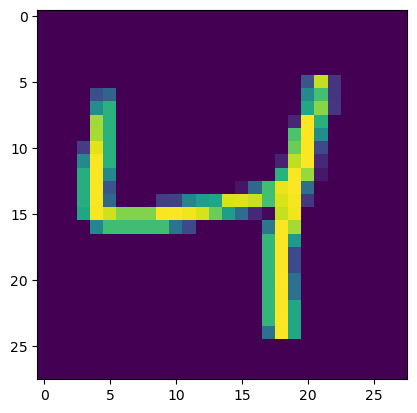

In [6]:
plt.imshow(X_train[2])

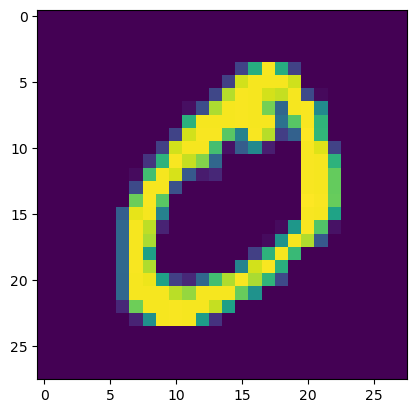

In [7]:
plt.imshow(X_train[1])

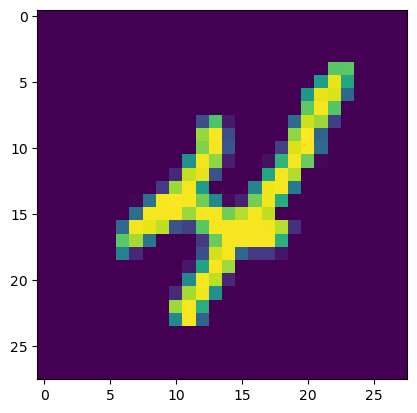

In [8]:
plt.imshow(X_train[9])

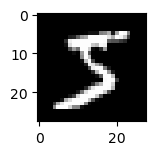

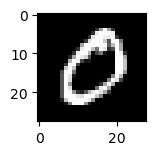

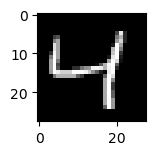

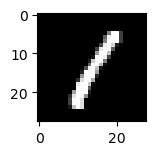

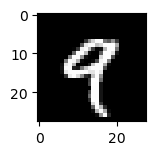

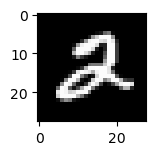

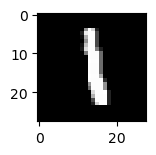

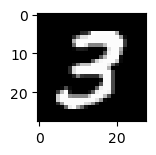

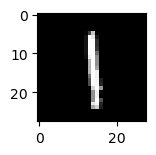

In [9]:
for i in range(9):
    plt.subplot(330 + 1 +i)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
    plt.show()

In [10]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

In [11]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [12]:
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [13]:
number_of_classes = 20

In [14]:
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 20)                92180     
                                                                 
Total params: 111,284
Trainable params: 111,284
Non-trainable params: 0
__________________________________________________

In [21]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])


In [22]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2050 - accuracy: 0.9523 - val_loss: 0.0849 - val_accuracy: 0.9738
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0697 - accuracy: 0.9791 - val_loss: 0.0700 - val_accuracy: 0.9788
Epoch 3/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0704 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.0666 - val_accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0854 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0734 - val_accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0919 -

In [23]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

Metrics(Test Loss & Test Accuracy):
[0.09639886766672134, 0.9846000075340271]


In [24]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 191ms/step
[[4.28571275e-17 7.13476864e-25 2.35145071e-14 6.14930199e-13
  1.89820819e-24 3.37056874e-20 1.33141719e-29 1.00000000e+00
  4.55493105e-19 5.96592198e-16 3.22307410e-19 3.67843992e-18
  8.51053497e-21 6.90056814e-20 3.63580466e-19 7.71404584e-27
  3.54198868e-19 7.34396694e-19 2.72798633e-21 7.22274158e-21]
 [4.60934650e-18 1.12180994e-17 1.00000000e+00 1.57469985e-20
  9.90841115e-31 9.64392703e-27 2.21060501e-15 9.64903054e-22
  5.89500288e-15 7.91851720e-27 3.42773080e-24 7.93120401e-22
  9.22087206e-23 1.30353062e-21 6.25249992e-22 5.50256987e-23
  1.73827866e-21 1.00021776e-22 2.13565434e-24 1.51951688e-22]
 [2.07375417e-14 9.99999523e-01 3.15070431e-12 4.36446669e-13
  4.72407208e-07 1.42668155e-09 1.76492894e-16 7.57477692e-11
  6.61857014e-10 3.23399856e-14 3.53276068e-17 1.92566181e-14
  2.27098189e-16 7.70408600e-16 8.61668777e-16 4.20386208e-12
  1.55365307e-14 5.01094824e-15 5.70807192e-16 8.93396460e-16]
 [1.00000000e+

In [25]:
print(np.argmax(prediction,axis = 1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
metrics=model.evaluate(X_test,y_test,verbose=1)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

313/313 [==============================] - 4s 11ms/step - loss: 0.0964 - accuracy: 0.9846
Metrics(Test Loss & Test Accuracy):
[0.09639886766672134, 0.9846000075340271]


In [27]:
prediction = model.predict(X_test[1:5])
print(prediction)

1/1 [==============================] - 0s 40ms/step
[[4.60934650e-18 1.12180994e-17 1.00000000e+00 1.57469985e-20
  9.90841115e-31 9.64392703e-27 2.21060501e-15 9.64903054e-22
  5.89500288e-15 7.91851720e-27 3.42773080e-24 7.93120401e-22
  9.22087206e-23 1.30353062e-21 6.25249992e-22 5.50256987e-23
  1.73827866e-21 1.00021776e-22 2.13565434e-24 1.51951688e-22]
 [2.07375417e-14 9.99999523e-01 3.15070431e-12 4.36446669e-13
  4.72407208e-07 1.42668155e-09 1.76492894e-16 7.57477692e-11
  6.61857014e-10 3.23399856e-14 3.53276068e-17 1.92566181e-14
  2.27098189e-16 7.70408600e-16 8.61668777e-16 4.20386208e-12
  1.55365307e-14 5.01094824e-15 5.70807192e-16 8.93396460e-16]
 [1.00000000e+00 5.38384504e-23 1.05771804e-12 2.86068460e-20
  3.77527196e-22 2.18609748e-11 8.48354512e-11 4.32407958e-22
  2.99999419e-14 6.15586195e-13 2.25418252e-20 3.26183488e-21
  5.85452092e-18 1.23090563e-19 6.41487804e-22 3.70026242e-21
  2.98637501e-20 3.31185087e-20 1.86885324e-21 5.13336555e-22]
 [9.15052461e-2

In [28]:
print(np.argmax(prediction,axis = 1))
print(y_test[1:5])

[2 1 0 4]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [29]:
model.save("MNIST.h5")